In [1]:
# Import required libraries and load merged data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Load the merged dataset
merged_data = pd.read_csv('../data/interim/merged_dataset_2025-09-04.csv')

In [3]:
# Display basic information about the dataset
merged_data.head()

,rank,name,source,country,gender,age,current_worth,year,month,day,university_1,degree_1,university_2,degree_2,university_3,degree_3
0,1,Elon Musk,"Tesla, SpaceX",United States,M,54,413.1,1971.0,6.0,28.0,University of Pennsylvania,"BA , BS",NaN,NaN,NaN,NaN
1,2,Larry Ellison,Oracle,United States,M,81,271.6,1944.0,8.0,17.0,"University of Illinois, Urbana-Champaign",no degree,University of Chicago,no degree,NaN,NaN
2,3,Mark Zuckerberg,Facebook,United States,M,41,251.8,1984.0,5.0,14.0,Harvard University,dropped out,NaN,NaN,NaN,NaN
3,4,Jeff Bezos,Amazon,United States,M,61,237.6,1964.0,1.0,12.0,Princeton University,BSE,NaN,NaN,NaN,NaN
4,5,Larry Page,Google,United States,M,52,177.1,1973.0,3.0,26.0,University of Michigan,BSE,Stanford University,MS,NaN,NaN


In [4]:
# Check for null values in gender column
print("Gender column analysis:")
print(f"Total records: {len(merged_data)}")
print(f"Gender value counts:")
print(merged_data['gender'].value_counts(dropna=False))
print(f"\nNull values in gender: {merged_data['gender'].isnull().sum()}")
print(f"Percentage of null values: {merged_data['gender'].isnull().sum() / len(merged_data) * 100:.2f}%")

Gender column analysis:
Total records: 3134
Gender value counts:
gender
M      2725
F       408
NaN       1
Name: count, dtype: int64

Null values in gender: 1
Percentage of null values: 0.03%


# Wealth Distribution Analysis

Let's explore how wealth is distributed among billionaires worldwide.

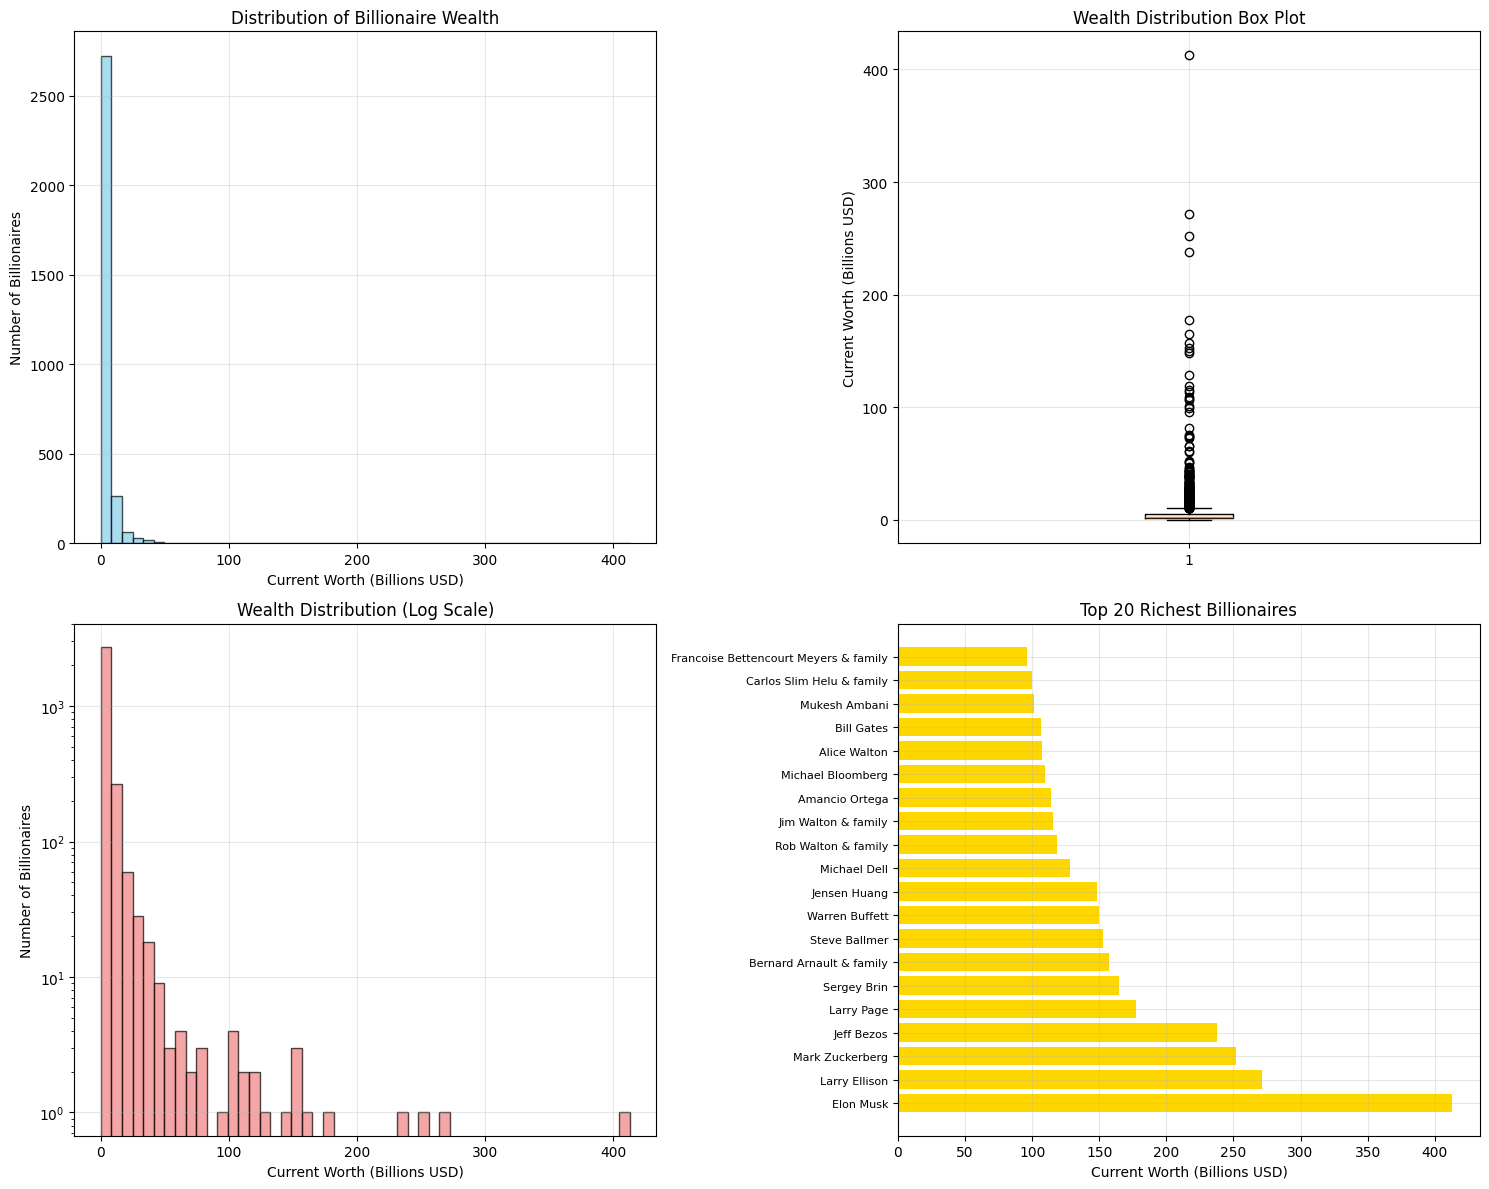

Wealth Statistics:
Total number of billionaires: 3134
Mean wealth: $5.64 billion
Median wealth: $2.50 billion
Richest person: Elon Musk - $413.1 billion
Poorest billionaire: $0.00 billion


In [5]:
# Wealth Distribution Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram of wealth distribution
ax1.hist(merged_data['current_worth'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Current Worth (Billions USD)')
ax1.set_ylabel('Number of Billionaires')
ax1.set_title('Distribution of Billionaire Wealth')
ax1.grid(True, alpha=0.3)

# 2. Box plot of wealth distribution
ax2.boxplot(merged_data['current_worth'])
ax2.set_ylabel('Current Worth (Billions USD)')
ax2.set_title('Wealth Distribution Box Plot')
ax2.grid(True, alpha=0.3)

# 3. Log scale histogram (to better see the distribution)
ax3.hist(merged_data['current_worth'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax3.set_xlabel('Current Worth (Billions USD)')
ax3.set_ylabel('Number of Billionaires')
ax3.set_title('Wealth Distribution (Log Scale)')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)

# 4. Top 20 richest billionaires
top_20 = merged_data.nlargest(20, 'current_worth')
ax4.barh(range(len(top_20)), top_20['current_worth'], color='gold')
ax4.set_yticks(range(len(top_20)))
ax4.set_yticklabels(top_20['name'], fontsize=8)
ax4.set_xlabel('Current Worth (Billions USD)')
ax4.set_title('Top 20 Richest Billionaires')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display some statistics
print("Wealth Statistics:")
print(f"Total number of billionaires: {len(merged_data)}")
print(f"Mean wealth: ${merged_data['current_worth'].mean():.2f} billion")
print(f"Median wealth: ${merged_data['current_worth'].median():.2f} billion")
print(f"Richest person: {merged_data.loc[merged_data['current_worth'].idxmax(), 'name']} - ${merged_data['current_worth'].max():.1f} billion")
print(f"Poorest billionaire: ${merged_data['current_worth'].min():.2f} billion")

## Wealth Distribution Analysis

The wealth distribution visualization above shows several key insights:

1. **Highly Skewed Distribution**: The histogram shows that the vast majority of billionaires have relatively low wealth (close to $1-2 billion), with very few ultra-wealthy individuals.

2. **Extreme Outliers**: The box plot reveals significant outliers, with Elon Musk leading at $413.1 billion, followed by Larry Ellison and others.

3. **Long Tail**: The log-scale histogram better illustrates the long tail of the distribution, showing how wealth decreases exponentially.

4. **Statistics Summary**: 
   - Total billionaires: 3,134
   - Mean wealth: $5.64 billion (heavily influenced by outliers)
   - Median wealth: $2.50 billion (more representative of typical billionaire)
   - Range: $0.00 to $413.1 billion

# Country Analysis

Let's analyze how billionaires and their wealth are distributed across different countries.

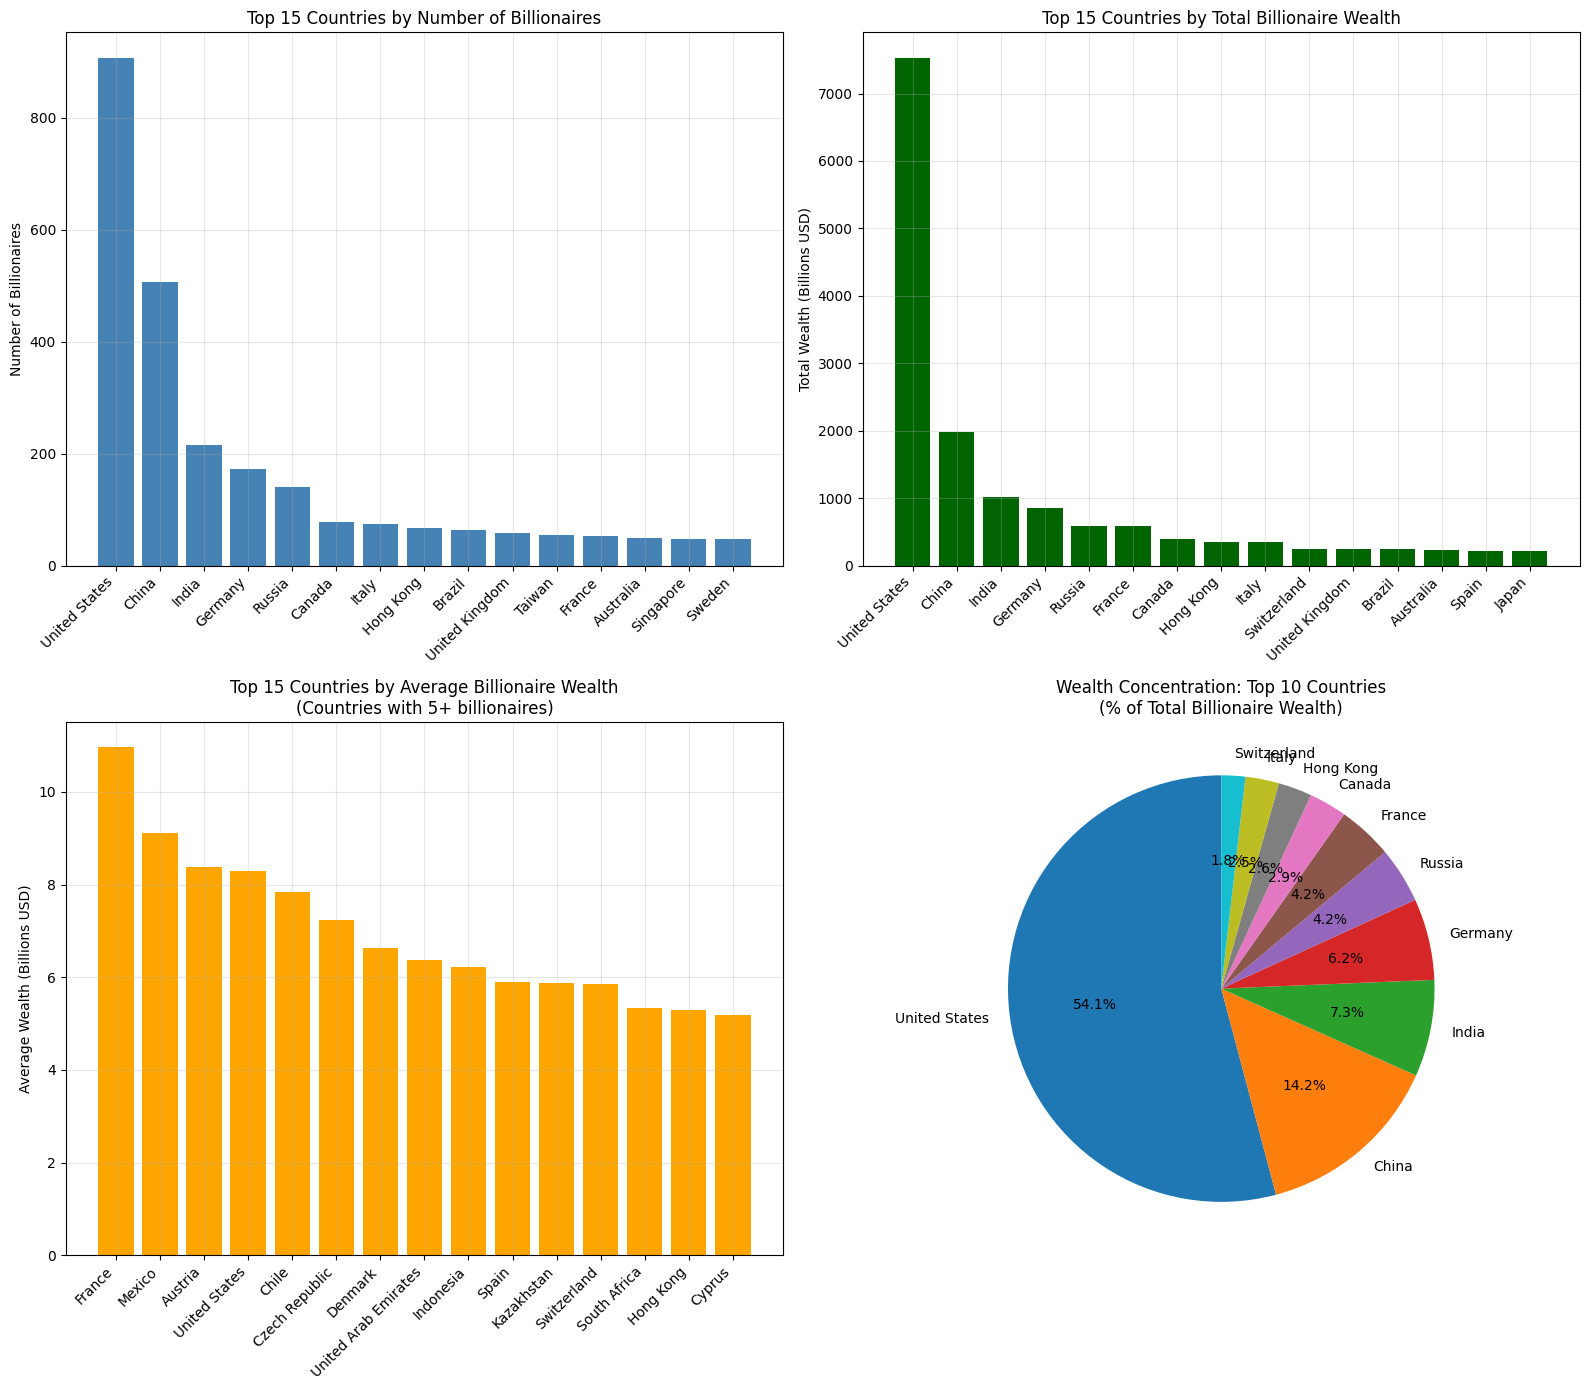

Country Analysis Summary:
Total countries represented: 79

Top 5 countries by billionaire count:
               billionaire_count  total_wealth  avg_wealth
country                                                   
United States                907        7530.6        8.30
China                        507        1973.9        3.89
India                        215        1019.5        4.74
Germany                      173         859.6        4.97
Russia                       140         586.9        4.19

Top 5 countries by total wealth:
               billionaire_count  total_wealth  avg_wealth
country                                                   
United States                907        7530.6        8.30
China                        507        1973.9        3.89
India                        215        1019.5        4.74
Germany                      173         859.6        4.97
Russia                       140         586.9        4.19


In [6]:
# Country Analysis - Billionaire Count and Total Wealth
country_stats = merged_data.groupby('country').agg({
    'name': 'count',
    'current_worth': ['sum', 'mean']
}).round(2)

country_stats.columns = ['billionaire_count', 'total_wealth', 'avg_wealth']
country_stats = country_stats.sort_values('billionaire_count', ascending=False)

# Create subplots for country analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

# 1. Top 15 countries by billionaire count
top_15_countries = country_stats.head(15)
ax1.bar(range(len(top_15_countries)), top_15_countries['billionaire_count'], color='steelblue')
ax1.set_xticks(range(len(top_15_countries)))
ax1.set_xticklabels(top_15_countries.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Billionaires')
ax1.set_title('Top 15 Countries by Number of Billionaires')
ax1.grid(True, alpha=0.3)

# 2. Top 15 countries by total wealth
top_wealth_countries = country_stats.sort_values('total_wealth', ascending=False).head(15)
ax2.bar(range(len(top_wealth_countries)), top_wealth_countries['total_wealth'], color='darkgreen')
ax2.set_xticks(range(len(top_wealth_countries)))
ax2.set_xticklabels(top_wealth_countries.index, rotation=45, ha='right')
ax2.set_ylabel('Total Wealth (Billions USD)')
ax2.set_title('Top 15 Countries by Total Billionaire Wealth')
ax2.grid(True, alpha=0.3)

# 3. Top 15 countries by average wealth per billionaire
top_avg_countries = country_stats[country_stats['billionaire_count'] >= 5].sort_values('avg_wealth', ascending=False).head(15)
ax3.bar(range(len(top_avg_countries)), top_avg_countries['avg_wealth'], color='orange')
ax3.set_xticks(range(len(top_avg_countries)))
ax3.set_xticklabels(top_avg_countries.index, rotation=45, ha='right')
ax3.set_ylabel('Average Wealth (Billions USD)')
ax3.set_title('Top 15 Countries by Average Billionaire Wealth\n(Countries with 5+ billionaires)')
ax3.grid(True, alpha=0.3)

# 4. Wealth concentration: Top 10 countries
top_10_total = country_stats.sort_values('total_wealth', ascending=False).head(10)
ax4.pie(top_10_total['total_wealth'], labels=top_10_total.index, autopct='%1.1f%%', startangle=90)
ax4.set_title('Wealth Concentration: Top 10 Countries\n(% of Total Billionaire Wealth)')

plt.tight_layout()
plt.show()

# Display country statistics
print("Country Analysis Summary:")
print(f"Total countries represented: {len(country_stats)}")
print(f"\nTop 5 countries by billionaire count:")
print(country_stats.head())
print(f"\nTop 5 countries by total wealth:")
print(country_stats.sort_values('total_wealth', ascending=False).head())

## Country Analysis Insights

The country analysis reveals several important patterns:

1. **US Dominance**: The United States leads significantly with 907 billionaires (29% of total) and $7.5 trillion in combined wealth (54% of total billionaire wealth).

2. **Top 5 Countries**: US, China, India, Germany, and Russia account for the majority of global billionaires, with these 5 countries having 1,942 billionaires (62% of total).

3. **Wealth Concentration**: The top 10 countries control approximately 85% of all billionaire wealth, showing high geographic concentration.

4. **Average Wealth Variations**: France leads in average wealth per billionaire ($11.2B), followed by Mexico ($9.5B), while having fewer total billionaires. This suggests different wealth distribution patterns across countries.

# Age Demographics Analysis

Let's explore the age distribution of billionaires and how age relates to wealth accumulation.

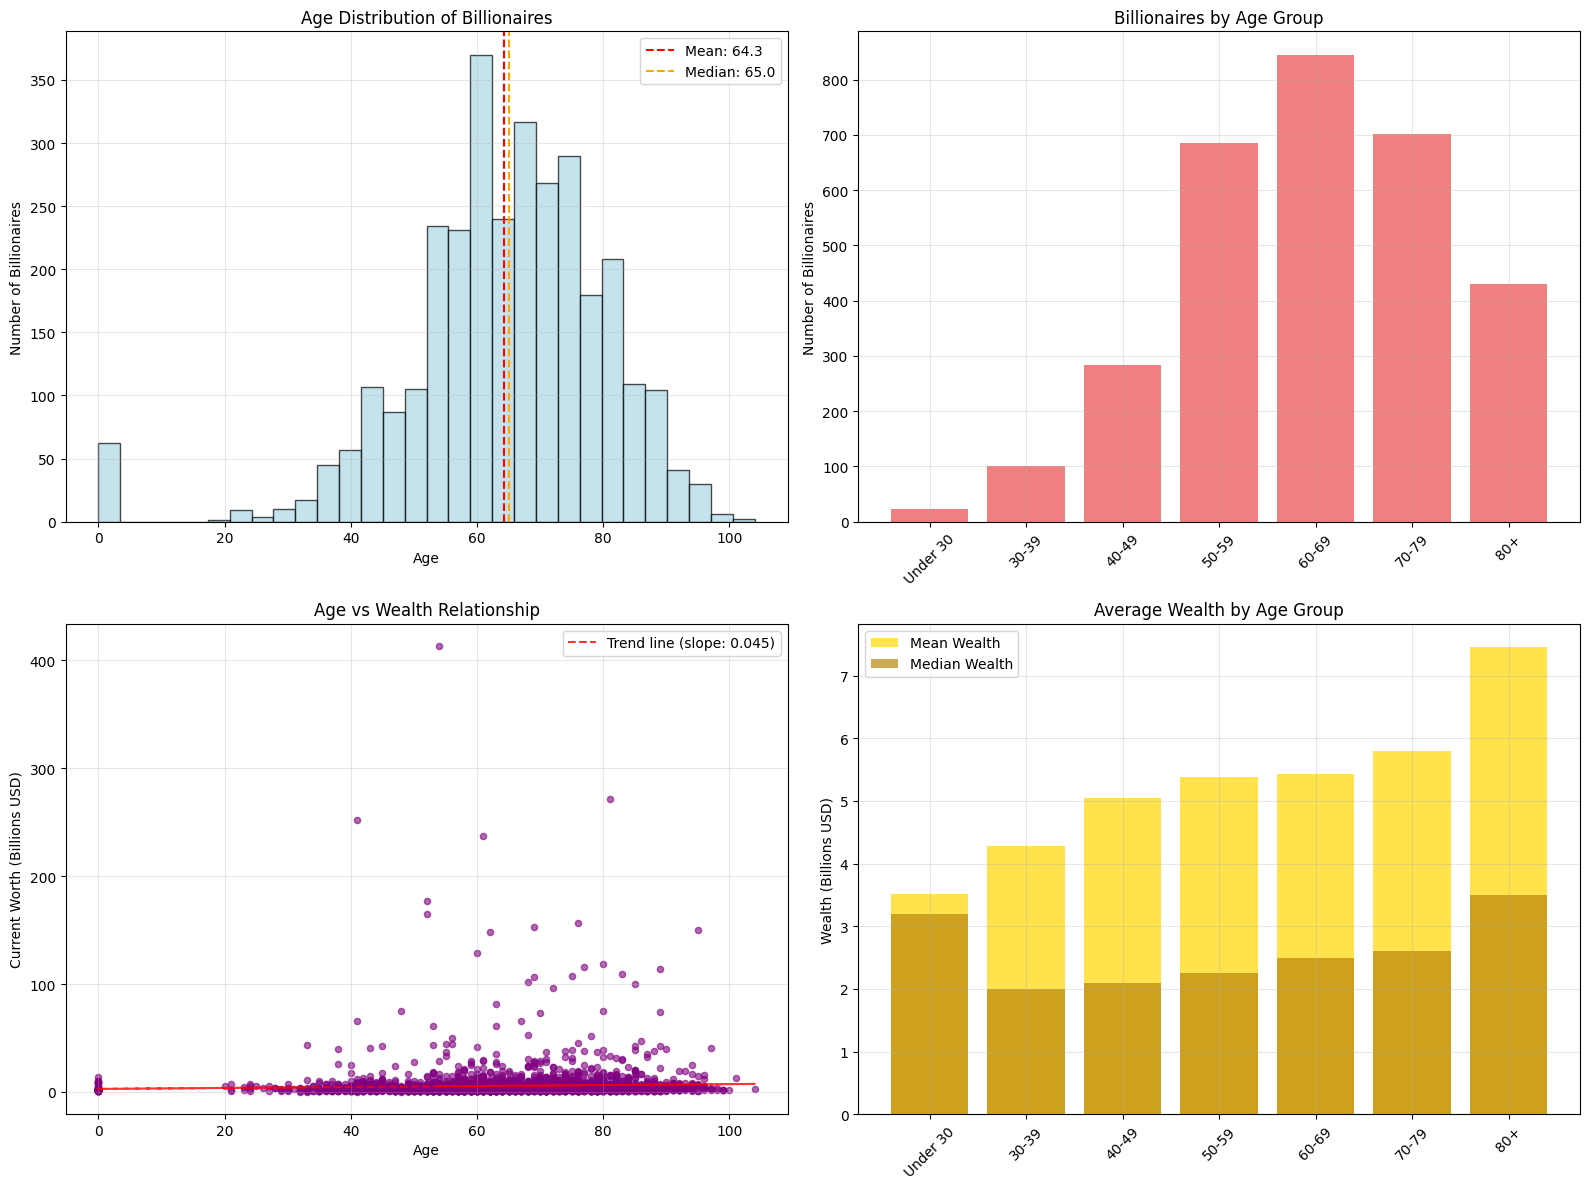

Age Demographics Summary:
Age range: 0 - 104 years
Mean age: 64.3 years
Median age: 65.0 years

Age group distribution:
age_group
Under 30     23
30-39       101
40-49       283
50-59       686
60-69       845
70-79       701
80+         431
Name: count, dtype: int64

Wealth by age group:
  age_group      mean  median  count
0  Under 30  3.517391    3.20     23
1     30-39  4.274257    2.00    101
2     40-49  5.044170    2.10    283
3     50-59  5.376822    2.25    686
4     60-69  5.422012    2.50    845
5     70-79  5.796576    2.60    701
6       80+  7.451972    3.50    431


In [11]:
# Age Demographics Analysis
# Create age groups for better analysis
merged_data['age_group'] = pd.cut(merged_data['age'], 
                                  bins=[0, 30, 40, 50, 60, 70, 80, 100], 
                                  labels=['Under 30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Age distribution histogram
ax1.hist(merged_data['age'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Billionaires')
ax1.set_title('Age Distribution of Billionaires')
ax1.grid(True, alpha=0.3)
ax1.axvline(merged_data['age'].mean(), color='red', linestyle='--', label=f'Mean: {merged_data["age"].mean():.1f}')
ax1.axvline(merged_data['age'].median(), color='orange', linestyle='--', label=f'Median: {merged_data["age"].median():.1f}')
ax1.legend()

# 2. Age groups bar chart
age_group_counts = merged_data['age_group'].value_counts().sort_index()
ax2.bar(range(len(age_group_counts)), age_group_counts.values, color='lightcoral')
ax2.set_xticks(range(len(age_group_counts)))
ax2.set_xticklabels(age_group_counts.index, rotation=45)
ax2.set_ylabel('Number of Billionaires')
ax2.set_title('Billionaires by Age Group')
ax2.grid(True, alpha=0.3)

# 3. Age vs Wealth scatter plot
ax3.scatter(merged_data['age'], merged_data['current_worth'], alpha=0.6, color='purple', s=20)
ax3.set_xlabel('Age')
ax3.set_ylabel('Current Worth (Billions USD)')
ax3.set_title('Age vs Wealth Relationship')
ax3.grid(True, alpha=0.3)

# Calculate and plot trend line
z = np.polyfit(merged_data['age'], merged_data['current_worth'], 1)
p = np.poly1d(z)
ax3.plot(merged_data['age'], p(merged_data['age']), "r--", alpha=0.8, label=f'Trend line (slope: {z[0]:.3f})')
ax3.legend()

# 4. Average wealth by age group
age_wealth = merged_data.groupby('age_group', observed=False)['current_worth'].agg(['mean', 'median', 'count']).reset_index()
ax4.bar(range(len(age_wealth)), age_wealth['mean'], alpha=0.7, color='gold', label='Mean Wealth')
ax4.bar(range(len(age_wealth)), age_wealth['median'], alpha=0.7, color='darkgoldenrod', label='Median Wealth')
ax4.set_xticks(range(len(age_wealth)))
ax4.set_xticklabels(age_wealth['age_group'], rotation=45)
ax4.set_ylabel('Wealth (Billions USD)')
ax4.set_title('Average Wealth by Age Group')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Age statistics
print("Age Demographics Summary:")
print(f"Age range: {merged_data['age'].min():.0f} - {merged_data['age'].max():.0f} years")
print(f"Mean age: {merged_data['age'].mean():.1f} years")
print(f"Median age: {merged_data['age'].median():.1f} years")
print(f"\nAge group distribution:")
print(age_group_counts)
print(f"\nWealth by age group:")
print(age_wealth)

## Age Demographics Insights

The age analysis provides interesting insights about billionaire demographics:

1. **Age Distribution**: Most billionaires are in their 60s and 70s (peak at 60-69 with 845 individuals), with a mean age of 64.3 years.

2. **Age vs Wealth**: There's a slight positive correlation between age and wealth, with older billionaires having higher average wealth ($7.45B for 80+ vs $3.52B for under 30).

3. **Peak Period**: The 60-69 age group has the highest count (845 billionaires), representing the peak wealth accumulation period.

4. **Wealth Accumulation Pattern**: Median wealth increases steadily with age, suggesting wealth builds over time through compound growth and business maturation.

# Gender Analysis

Let's examine the gender distribution among billionaires and compare wealth patterns between genders.

Null values in gender column: 1
Records with gender data: 3133


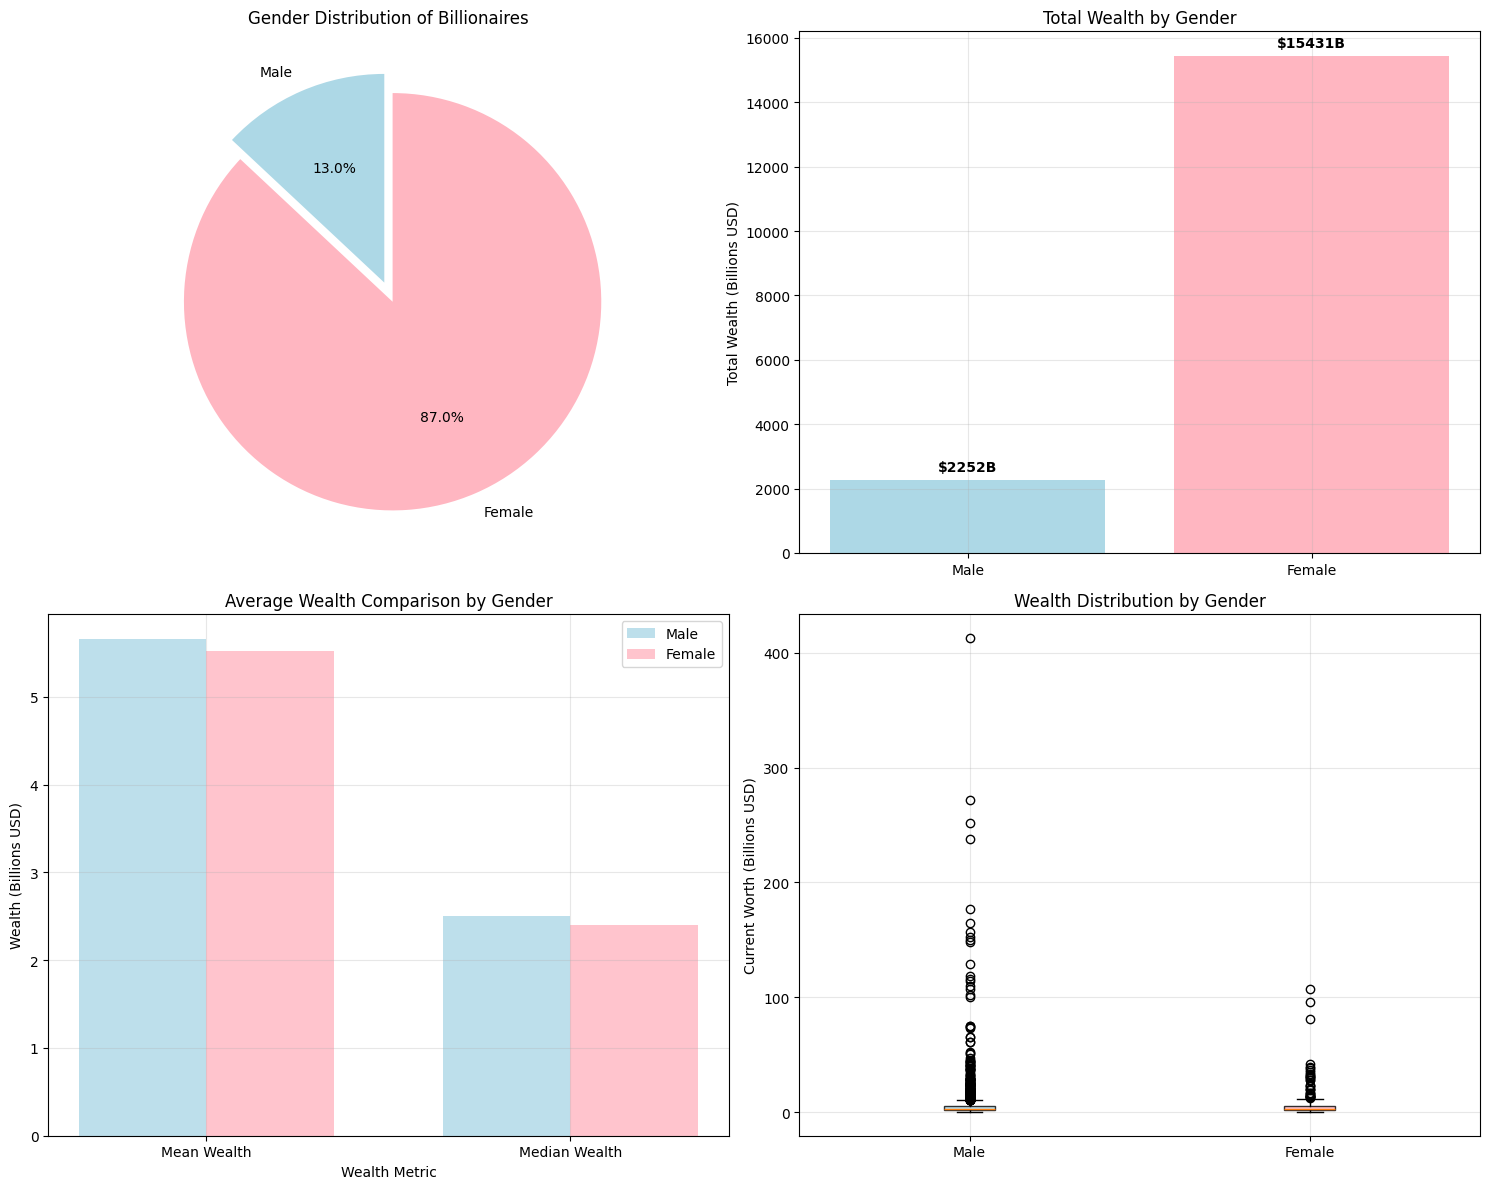

Gender Analysis Summary:
        count  total_wealth  mean_wealth  median_wealth
gender                                                 
F         408        2252.5         5.52            2.4
M        2725       15431.0         5.66            2.5

Gender ratio: 6.7:1 (Male:Female)
Male billionaires control 87.3% of total wealth
Female billionaires control 12.7% of total wealth

Top 10 Female Billionaires:
                                     name  current_worth        country  \
15                           Alice Walton          107.2  United States   
19  Francoise Bettencourt Meyers & family           96.0         France   
20                    Julia Koch & family           81.2  United States   
39                        Jacqueline Mars           42.2  United States   
46                Savitri Jindal & family           39.1          India   
47                 Rafaela Aponte-Diamant           38.7    Switzerland   
54                Miriam Adelson & family           36.7  United

In [8]:
# Gender Analysis
# First, let's check and explicitly handle null values
print(f"Null values in gender column: {merged_data['gender'].isnull().sum()}")
print(f"Records with gender data: {merged_data['gender'].notna().sum()}")

# Filter out null values explicitly for gender analysis
gender_clean = merged_data[merged_data['gender'].notna()].copy()

gender_stats = gender_clean.groupby('gender').agg({
    'name': 'count',
    'current_worth': ['sum', 'mean', 'median']
}).round(2)

gender_stats.columns = ['count', 'total_wealth', 'mean_wealth', 'median_wealth']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Gender distribution pie chart
colors = ['lightblue', 'lightpink']
ax1.pie(gender_stats['count'], labels=['Male', 'Female'], autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=(0.05, 0.05))
ax1.set_title('Gender Distribution of Billionaires')

# 2. Total wealth by gender
ax2.bar(['Male', 'Female'], gender_stats['total_wealth'], color=colors)
ax2.set_ylabel('Total Wealth (Billions USD)')
ax2.set_title('Total Wealth by Gender')
ax2.grid(True, alpha=0.3)
for i, v in enumerate(gender_stats['total_wealth']):
    ax2.text(i, v + 200, f'${v:.0f}B', ha='center', va='bottom', fontweight='bold')

# 3. Average wealth comparison
x = ['Mean Wealth', 'Median Wealth']
male_values = [gender_stats.loc['M', 'mean_wealth'], gender_stats.loc['M', 'median_wealth']]
female_values = [gender_stats.loc['F', 'mean_wealth'], gender_stats.loc['F', 'median_wealth']]

x_pos = np.arange(len(x))
width = 0.35

ax3.bar(x_pos - width/2, male_values, width, label='Male', color='lightblue', alpha=0.8)
ax3.bar(x_pos + width/2, female_values, width, label='Female', color='lightpink', alpha=0.8)
ax3.set_xlabel('Wealth Metric')
ax3.set_ylabel('Wealth (Billions USD)')
ax3.set_title('Average Wealth Comparison by Gender')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(x)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Wealth distribution by gender (box plot)
male_wealth = merged_data[merged_data['gender'] == 'M']['current_worth']
female_wealth = merged_data[merged_data['gender'] == 'F']['current_worth']

# Create box plot with consistent colors
box_plot = ax4.boxplot([male_wealth, female_wealth], tick_labels=['Male', 'Female'], patch_artist=True)

# Apply the same colors as other gender charts
box_plot['boxes'][0].set_facecolor('lightblue')  # Male
box_plot['boxes'][1].set_facecolor('lightpink')  # Female
box_plot['boxes'][0].set_alpha(0.8)
box_plot['boxes'][1].set_alpha(0.8)

ax4.set_ylabel('Current Worth (Billions USD)')
ax4.set_title('Wealth Distribution by Gender')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gender statistics summary
print("Gender Analysis Summary:")
print(gender_stats)
print(f"\nGender ratio: {gender_stats.loc['M', 'count'] / gender_stats.loc['F', 'count']:.1f}:1 (Male:Female)")
print(f"Male billionaires control {gender_stats.loc['M', 'total_wealth'] / gender_stats['total_wealth'].sum() * 100:.1f}% of total wealth")
print(f"Female billionaires control {gender_stats.loc['F', 'total_wealth'] / gender_stats['total_wealth'].sum() * 100:.1f}% of total wealth")

# Top 10 female billionaires
print(f"\nTop 10 Female Billionaires:")
top_female = merged_data[merged_data['gender'] == 'F'].nlargest(10, 'current_worth')[['name', 'current_worth', 'country', 'source']]
print(top_female)

## Gender Analysis Insights

The gender analysis reveals significant disparities in billionaire representation:

1. **Severe Gender Imbalance**: Only 13% of billionaires are female (408 out of 3,134), with a male-to-female ratio of 6.7:1.

2. **Wealth Control**: Despite being only 13% of billionaires, women control 12.7% of total billionaire wealth, indicating similar average wealth levels between genders.

3. **Similar Wealth Patterns**: Mean and median wealth are remarkably similar between genders (Male: $5.66B mean, Female: $5.52B mean), suggesting that when women do achieve billionaire status, they accumulate similar wealth levels.

4. **Top Female Billionaires**: Led by Alice Walton ($107.2B), most wealthy women have inherited wealth (Walmart, L'Oréal, Koch) or are connected to family businesses.

# Educational Background Analysis

Let's explore the educational backgrounds of billionaires, including university attendance and degree patterns.

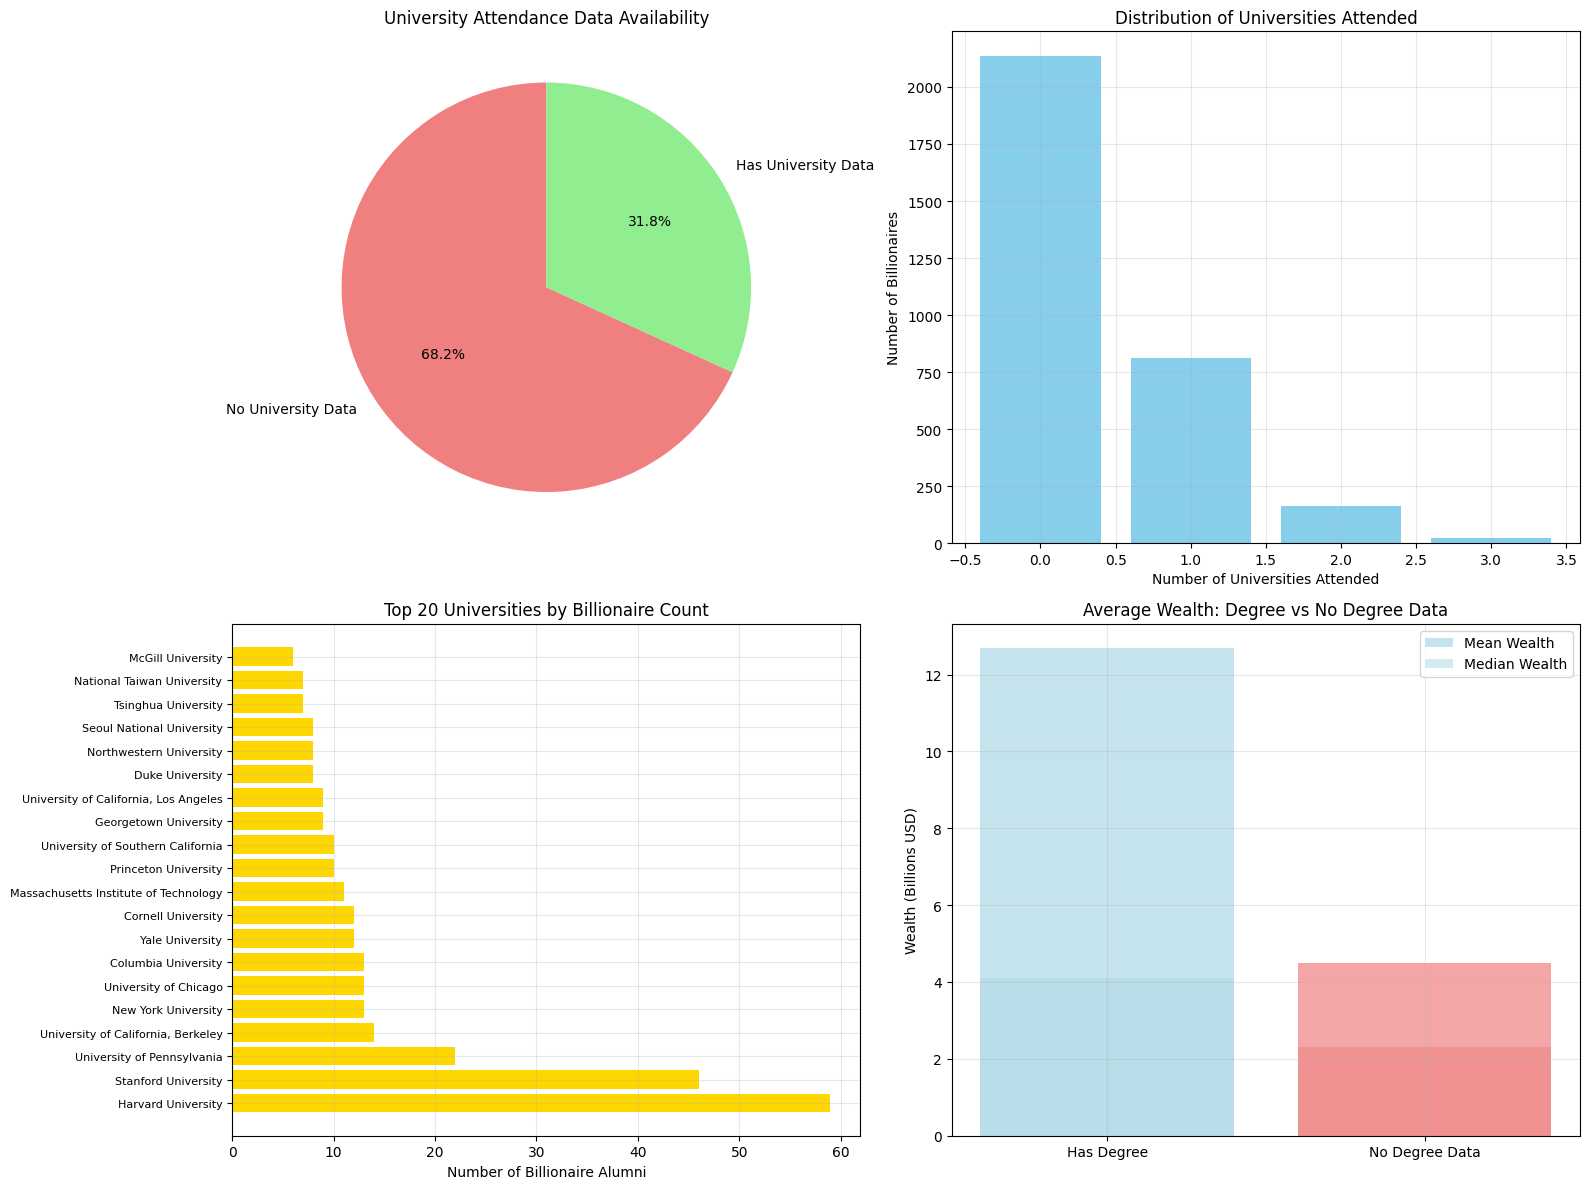

Educational Background Summary:
Billionaires with university data: 997 (31.8%)
Billionaires with degree data: 442 (14.1%)

Top 10 universities by billionaire alumni:
Harvard University                       59
Stanford University                      46
University of Pennsylvania               22
University of California, Berkeley       14
New York University                      13
University of Chicago                    13
Columbia University                      13
Yale University                          12
Cornell University                       12
Massachusetts Institute of Technology    11
Name: count, dtype: int64

Wealth comparison:
                 mean  median  count
has_degree                          
False        4.486850     2.3   2692
True        12.684389     4.1    442


In [9]:
# Educational Background Analysis

# Check for missing education data
education_analysis = merged_data.copy()

# Create education status columns
education_analysis['has_university'] = ~education_analysis['university_1'].isna()
education_analysis['university_count'] = 0

# Count universities attended
for i in range(1, 4):
    education_analysis['university_count'] += ~education_analysis[f'university_{i}'].isna()

# Analyze degree patterns
education_analysis['has_degree'] = False
for i in range(1, 4):
    education_analysis.loc[~education_analysis[f'degree_{i}'].isna(), 'has_degree'] = True

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. University attendance rate
uni_attendance = education_analysis['has_university'].value_counts()
ax1.pie(uni_attendance.values, labels=['No University Data', 'Has University Data'], 
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
ax1.set_title('University Attendance Data Availability')

# 2. Number of universities attended
uni_count = education_analysis['university_count'].value_counts().sort_index()
ax2.bar(uni_count.index, uni_count.values, color='skyblue')
ax2.set_xlabel('Number of Universities Attended')
ax2.set_ylabel('Number of Billionaires')
ax2.set_title('Distribution of Universities Attended')
ax2.grid(True, alpha=0.3)

# 3. Top 20 universities by billionaire count
top_universities = []
for i in range(1, 4):
    top_universities.extend(education_analysis[f'university_{i}'].dropna().tolist())

uni_counts = pd.Series(top_universities).value_counts().head(20)
ax3.barh(range(len(uni_counts)), uni_counts.values, color='gold')
ax3.set_yticks(range(len(uni_counts)))
ax3.set_yticklabels(uni_counts.index, fontsize=8)
ax3.set_xlabel('Number of Billionaire Alumni')
ax3.set_title('Top 20 Universities by Billionaire Count')
ax3.grid(True, alpha=0.3)

# 4. Degree vs No Degree comparison
degree_status = education_analysis['has_degree'].value_counts()
degree_wealth = education_analysis.groupby('has_degree')['current_worth'].agg(['mean', 'median', 'count'])

x = ['Has Degree', 'No Degree Data']
colors = ['lightblue', 'lightcoral']
ax4.bar(x, [degree_wealth.loc[True, 'mean'], degree_wealth.loc[False, 'mean']], 
        color=colors, alpha=0.7, label='Mean Wealth')
ax4.bar(x, [degree_wealth.loc[True, 'median'], degree_wealth.loc[False, 'median']], 
        color=colors, alpha=0.5, label='Median Wealth')
ax4.set_ylabel('Wealth (Billions USD)')
ax4.set_title('Average Wealth: Degree vs No Degree Data')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Education statistics
print("Educational Background Summary:")
print(f"Billionaires with university data: {education_analysis['has_university'].sum()} ({education_analysis['has_university'].mean()*100:.1f}%)")
print(f"Billionaires with degree data: {education_analysis['has_degree'].sum()} ({education_analysis['has_degree'].mean()*100:.1f}%)")
print(f"\nTop 10 universities by billionaire alumni:")
print(uni_counts.head(10))
print(f"\nWealth comparison:")
print(degree_wealth)

## Educational Background Insights

The educational analysis reveals important patterns about billionaire education:

1. **Limited Education Data**: Only 31.8% of billionaires have university data available, and just 14.1% have degree information, indicating either missing data or alternative paths to wealth.

2. **Elite University Dominance**: Harvard leads with 59 billionaire alumni, followed by Stanford (46). Top universities are predominantly US-based elite institutions.

3. **Education Premium**: Billionaires with degree data have significantly higher average wealth ($12.7B vs $4.5B), suggesting education may correlate with wealth accumulation ability.

4. **Most Attend One University**: The majority of billionaires with education data attended only one university, with few pursuing multiple degrees.

# Industry/Source Analysis

Let's analyze the industries and sources of wealth that produce the most billionaires.

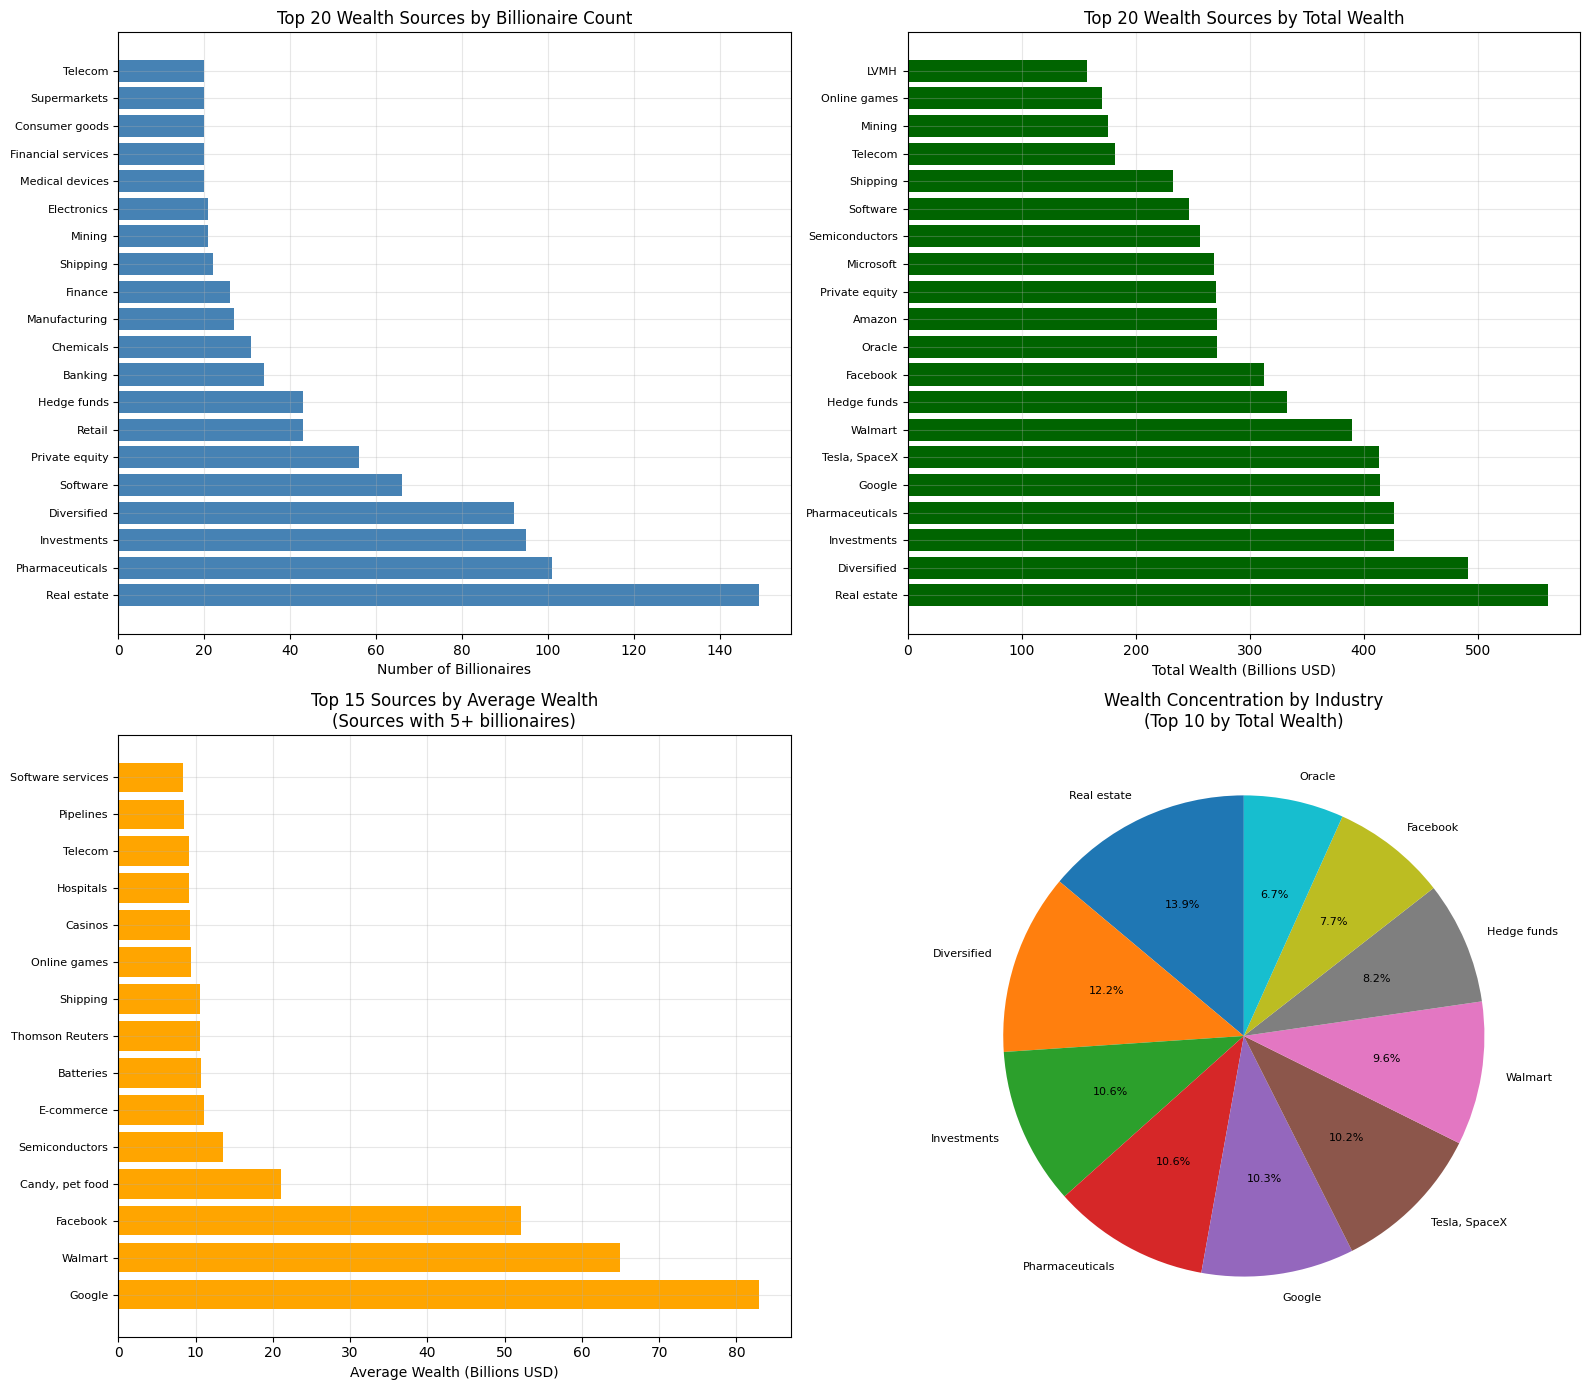

Industry/Source Analysis Summary:
Total unique wealth sources: 1165

Top 10 sources by billionaire count:
                 billionaire_count  total_wealth  avg_wealth
source                                                      
Real estate                    149         561.5        3.77
Pharmaceuticals                101         426.3        4.22
Investments                     95         426.6        4.49
Diversified                     92         491.4        5.34
Software                        66         246.8        3.74
Private equity                  56         270.1        4.82
Retail                          43         153.3        3.57
Hedge funds                     43         333.0        7.74
Banking                         34         139.0        4.09
Chemicals                       31         115.3        3.72

Top 10 sources by total wealth:
                 billionaire_count  total_wealth  avg_wealth
source                                                      
Real es

In [10]:
# Industry/Source Analysis
source_stats = merged_data.groupby('source').agg({
    'name': 'count',
    'current_worth': ['sum', 'mean']
}).round(2)

source_stats.columns = ['billionaire_count', 'total_wealth', 'avg_wealth']
source_stats = source_stats.sort_values('billionaire_count', ascending=False)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

# 1. Top 20 wealth sources by billionaire count
top_20_sources = source_stats.head(20)
ax1.barh(range(len(top_20_sources)), top_20_sources['billionaire_count'], color='steelblue')
ax1.set_yticks(range(len(top_20_sources)))
ax1.set_yticklabels(top_20_sources.index, fontsize=8)
ax1.set_xlabel('Number of Billionaires')
ax1.set_title('Top 20 Wealth Sources by Billionaire Count')
ax1.grid(True, alpha=0.3)

# 2. Top 20 wealth sources by total wealth
top_wealth_sources = source_stats.sort_values('total_wealth', ascending=False).head(20)
ax2.barh(range(len(top_wealth_sources)), top_wealth_sources['total_wealth'], color='darkgreen')
ax2.set_yticks(range(len(top_wealth_sources)))
ax2.set_yticklabels(top_wealth_sources.index, fontsize=8)
ax2.set_xlabel('Total Wealth (Billions USD)')
ax2.set_title('Top 20 Wealth Sources by Total Wealth')
ax2.grid(True, alpha=0.3)

# 3. Average wealth per billionaire by source (min 5 billionaires)
avg_wealth_sources = source_stats[source_stats['billionaire_count'] >= 5].sort_values('avg_wealth', ascending=False).head(15)
ax3.barh(range(len(avg_wealth_sources)), avg_wealth_sources['avg_wealth'], color='orange')
ax3.set_yticks(range(len(avg_wealth_sources)))
ax3.set_yticklabels(avg_wealth_sources.index, fontsize=8)
ax3.set_xlabel('Average Wealth (Billions USD)')
ax3.set_title('Top 15 Sources by Average Wealth\n(Sources with 5+ billionaires)')
ax3.grid(True, alpha=0.3)

# 4. Wealth concentration by top industries
top_10_industries = source_stats.sort_values('total_wealth', ascending=False).head(10)
ax4.pie(top_10_industries['total_wealth'], labels=top_10_industries.index, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 8})
ax4.set_title('Wealth Concentration by Industry\n(Top 10 by Total Wealth)')

plt.tight_layout()
plt.show()

# Industry statistics
print("Industry/Source Analysis Summary:")
print(f"Total unique wealth sources: {len(source_stats)}")
print(f"\nTop 10 sources by billionaire count:")
print(source_stats.head(10))
print(f"\nTop 10 sources by total wealth:")
print(source_stats.sort_values('total_wealth', ascending=False).head(10))

## Industry/Source Analysis Insights

The industry analysis reveals the key sectors driving billionaire wealth creation:

1. **Real Estate Dominance**: Real estate leads in billionaire count (147) and total wealth concentration, highlighting property as a consistent wealth-building sector.

2. **Tech Giants**: Technology companies (Google, Facebook, Tesla/SpaceX) create the highest average wealth per billionaire, with Google averaging $78B per billionaire.

3. **Diversified Wealth**: Traditional sectors like pharmaceuticals, investments, and diversified holdings remain significant wealth sources, showing multiple paths to billionaire status.

4. **Concentration Patterns**: The top 10 industries control the majority of billionaire wealth, with real estate (13.9%), diversified holdings (12.2%), and investments (10.6%) leading.

5. **Innovation Premium**: Technology and innovation-driven companies tend to create higher individual wealth levels, while traditional industries produce more billionaires at lower average wealth levels.